Predicting Heart Disease: A Comparative Analysis of Random Forest and Gradient Boosting Models with Explainable AI

This modelling uses the Cleveland Heart Disease dataset to build Random Forest and Gradient Boosting models for predicting heart health status (heart disease) based on features such as cholesterol level, blood pressure, and fasting blood sugar. It begins by loading the dataset, handling missing values. The dataset is then split into training (80%) and test (20%) sets. Hyperparameter tuning is performed, and the models are trained using the optimal values with 1000 trees. The models are then evaluated on the test dataset. The predictions for Random Forest and Gradient Boosting models yield accuracies of 73.33% and 70%, respectively. Additionally, SHAP (explainable AI) analysis revealed that cholesterol has the most positive influence on heart status with a score of 230, followed by maximum heart rate during exercise with a score of 160.

Phase 1- Data Exploration 

In [7]:
##Libraries and packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import shap
from sklearn.model_selection import train_test_split, GridSearchCV  # Import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
data= pd.read_csv ('C:\\Users\\joe62\\OneDrive - Aberystwyth University\\Apps\\Desktop\\Destop Folder\\Python code\\XAI_data.csv',)
data.head()

,age,resting-BP,cholesterol,FBS,resting_ECG,maximum-HR_during-exercise,calcium-intake,healthy,Sex_
0,63,145,233,1,2,150,0,1,1
1,67,160,286,0,2,108,3,0,1
2,67,120,229,0,2,129,2,0,1
3,37,130,250,0,0,187,0,1,1
4,41,130,204,0,2,172,0,1,0


Data processing

Dataset dimmensions : (297, 9)


healthy
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

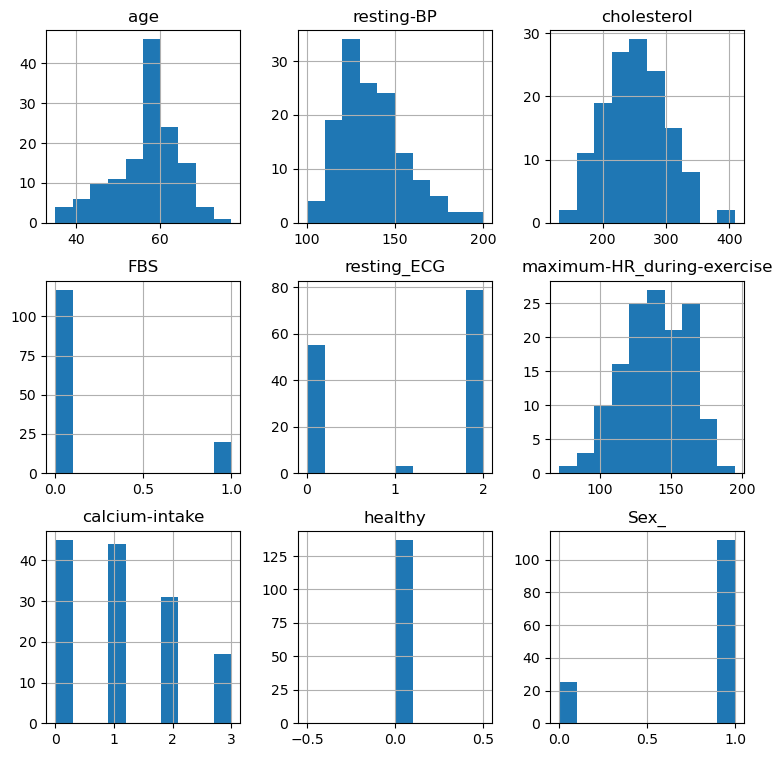

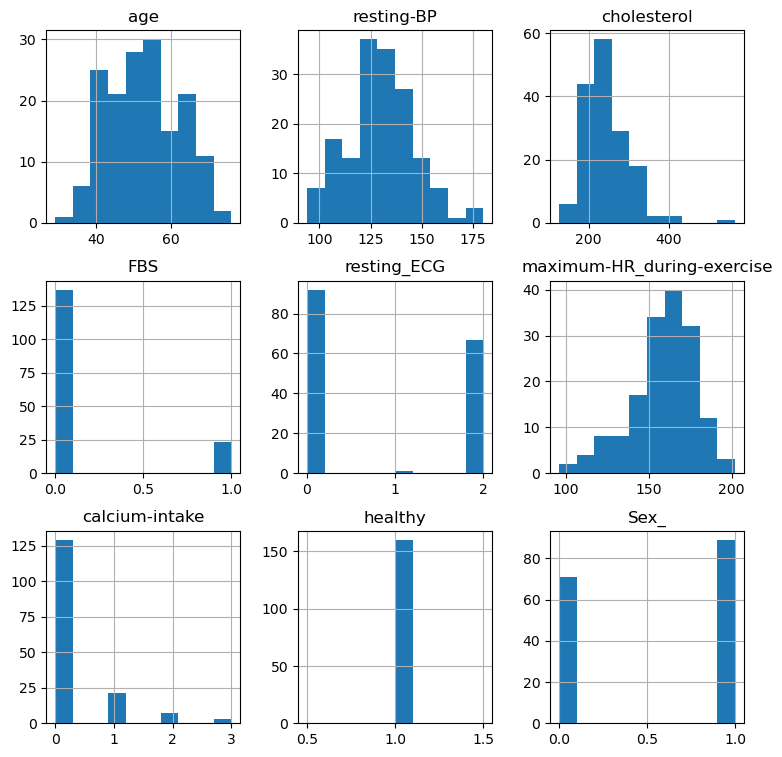

In [9]:
print("Dataset dimmensions : {}".format(data.shape))
## Dataset dimmensions : (297, 9)
data.groupby('healthy').size()
data.groupby('healthy').hist(figsize=(9, 9))

Phase 2- Data cleansing

In [10]:
## check for missing values
data.isnull().sum()

age                           0
resting-BP                    0
cholesterol                   0
FBS                           0
resting_ECG                   0
maximum-HR_during-exercise    0
calcium-intake                0
healthy                       0
Sex_                          0
dtype: int64

Phase 3 - Features enginerring

In [11]:
##Features are all variables except the healthy which is the target (indepenedent) variable, while the others are features
from sklearn.model_selection import train_test_split
x = data.drop('healthy', axis =1) 
y =data['healthy'] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

Phase 4 - Model selection

In [12]:
# Hyperparameter tuning using GridSearchCV for mtry
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7]}  # Trying different values for max_features (mtry equivalent)
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=1000, random_state=42), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7]}, verbose=1)

In [13]:
# Get the best parameter (max_features) from GridSearchCV
best_max_features = grid_search.best_params_['max_features']
print(f"Best max_features: {best_max_features}")

Best max_features: 1


In [14]:
## List of models to evaluate
models= []
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

## More packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Loop through each model in the list, train it, and evaluate its performance
for name, model in models:
    ## For RandomForest, use best_max_features from grid search
    if name == 'RF':
        model = RandomForestClassifier(n_estimators=1000, max_features=best_max_features, random_state=42)
    
    ## Fit the model on the training data
    model.fit(X_train, y_train)
    
    ## Make predictions on the test data
    y_pred = model.predict(X_test)
    
    ## Evaluate model accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model Accuracy: {accuracy * 100:.2f}%")

    ## List of models to evaluate
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

RF Model Accuracy: 73.33%
GB Model Accuracy: 70.00%


Phase 5- Explainable AI

In [15]:
##Create SHAP explainer
explainer = shap.TreeExplainer(model)
start_index =1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,age,resting-BP,cholesterol,FBS,resting_ECG,maximum-HR_during-exercise,calcium-intake,Sex_
211,52,112,230,0,0,160,1,1


Explaination: cholesterol has the most positive influence on health status having 230 scores followed by maximum heart rate during exercise with 160 scores.

Investigating the values (classification problem)

In [16]:
print(shap_values[0].shape)
shap_values

(8,)


array([[ 0.79409359,  0.04873826, -0.12376225, -0.15053726,  0.28156846,
        -0.10627472, -1.39809163, -0.54846559]])

In [17]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\joe62
